# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Review weather API output
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Cleveland, Ohio"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 41.4995,
        "lon": -81.6954
    },
    "dt": 1631575006,
    "id": 5150529,
    "main": {
        "feels_like": 77.79,
        "humidity": 80,
        "pressure": 1016,
        "temp": 76.66,
        "temp_max": 81.95,
        "temp_min": 71.47
    },
    "name": "Cleveland",
    "sys": {
        "country": "US",
        "id": 3455,
        "sunrise": 1631531125,
        "sunset": 1631576404,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 4.61
    }
}


In [15]:
max_temps = []
humidities = []
clouds = []
wind_speeds = []

dates = []
lats = []
lngs = []
cities_found = []
countries = []

count = 0
set_count = 1

print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query_url).json()
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        dates.append(response['dt'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        countries.append(response['sys']['country'])
        if count == 50:
            count = 1
            set_count += 1
            cities_found.append(city)
        else:
            count +=1
            cities_found.append(city)
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except:
        print(f"{city} not found...")

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | kushiro
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | nizwa
Processing Record 7 of Set 1 | bucak
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | ukiah
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | slave lake
Processing Record 18 of Set 1 | kalmunai
Processing Record 19 of Set 1 | labytnangi
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | beyneu
nizhneyansk not found...
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | puert

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
print(len(cities_found))
print(len(countries))
print(len(lats))
print(len(lngs))
print(len(max_temps))
print(len(humidities))
print(len(clouds))
print(len(wind_speeds))
print(len(dates))

562
562
562
562
562
562
562
562
562


In [18]:
weather_dict = {
    "City": cities_found,
    "Country": countries,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": clouds,
    "Wind Speed": wind_speeds,
    "Date": dates
}

In [21]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,lebu,CL,-37.6167,-73.6500,46.47,76,1,9.46,1631576906
1,kushiro,JP,42.9750,144.3747,59.95,55,40,8.05,1631576906
2,hobart,AU,-42.8794,147.3294,51.26,71,20,1.99,1631576815
3,kavieng,PG,-2.5744,150.7967,84.36,72,87,15.46,1631576906
4,mataura,NZ,-46.1927,168.8643,45.48,77,86,0.51,1631576907


In [31]:
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.131173,25.380840,66.222900,72.030249,54.537367,7.712651,1.631577e+09
std,34.065284,89.578768,15.596681,19.501108,38.353634,5.404968,8.694660e+01
min,-54.800000,-175.200000,19.920000,9.000000,0.000000,0.000000,1.631576e+09
25%,-9.445800,-56.150700,53.942500,63.000000,14.000000,3.707500,1.631577e+09
50%,23.091650,30.690550,68.115000,77.000000,62.000000,6.430000,1.631577e+09
75%,47.769875,106.111550,78.350000,86.000000,92.000000,10.822500,1.631577e+09
max,78.218600,179.316700,111.650000,100.000000,100.000000,33.870000,1.631577e+09


In [24]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
high_humid = weather_df.loc[weather_df["Humidity"] > 100]
len(high_humid)

0

In [30]:
max_humid = max(weather_df["Humidity"])
max_humid

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

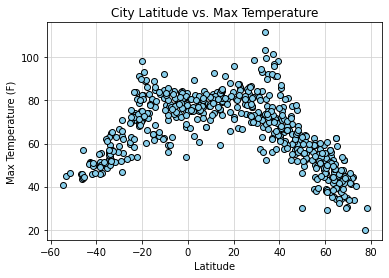

In [34]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], edgecolors = "black", facecolors = "skyblue", zorder = 3)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (which = "major", axis = "both", linestyle = "-", color = "lightgrey", zorder = -1)
plt.savefig("Figures/latvtemp1.png")
plt.show()

In [79]:
import plotly.express as px

fig = px.scatter(weather_df, x = "Longitude", y = "Latitude", color = "Max Temp", size = "Cloudiness", hover_data = ['City', 'Country'])
print("World Map Weather")
fig.show()

World Map Weather


Temperatures are generally highest between 0 and 20 latitude (corresponding to the equator and just north of the equator).

## Latitude vs. Humidity Plot

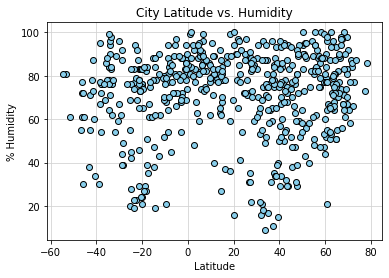

In [35]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors = "black", facecolors = "skyblue", zorder = 3)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.grid (which = "major", axis = "both", linestyle = "-", color = "lightgrey", zorder = -1)
plt.savefig("Figures/latvhumid1.png")
plt.show()

Humidity is randomly distributed across the globe, with most cities having a percent humidity between 60 and 100%.

## Latitude vs. Cloudiness Plot

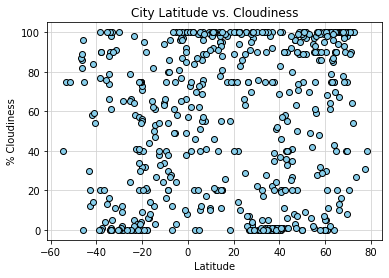

In [36]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors = "black", facecolors = "skyblue", zorder = 3)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.grid (which = "major", axis = "both", linestyle = "-", color = "lightgrey", zorder = -1)
plt.savefig("Figures/latvclouds.png")
plt.show()

Cloudiness is randomly distributed across the globe, with clusters of cities having either 100% coverage or 0% clouds.

## Latitude vs. Wind Speed Plot

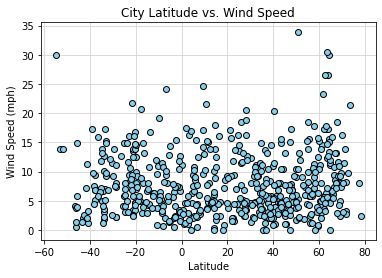

In [37]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors = "black", facecolors = "skyblue", zorder = 3)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (which = "major", axis = "both", linestyle = "-", color = "lightgrey", zorder = -1)
plt.savefig("Figures/latvwind1.png")
plt.show()

Wind speed is randomly distributed across the globe, with most cities experiencing winds between 0 and 10 mph.

## Linear Regression

In [40]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =-0.63x + 90.23.
The r-squared is: 0.62


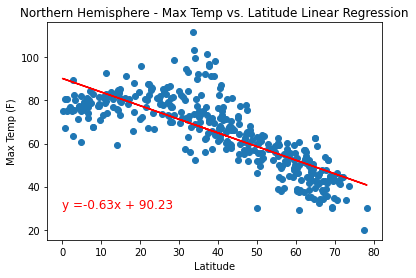

In [50]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slopen, interceptn, rvaluen, pvaluen, stderrn) = linregress(x_values, y_values)
rsqn = round(rvaluen**2,2)
regress_values = x_values * slopen + interceptn
line_eqn = "y =" + str(round(slopen,2)) + "x + " + str(round(interceptn,2))
print(f"Regression line equation is: {line_eqn}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eqn,(0,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqn}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =0.75x + 83.86.
The r-squared is: 0.57


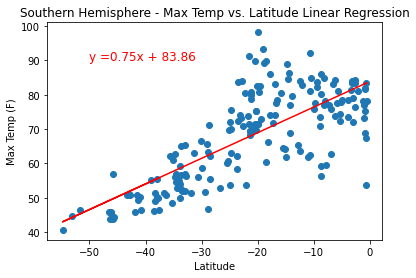

In [55]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slopes, intercepts, rvalues, pvalues, stderrs) = linregress(x_values, y_values)
rsqs = round(rvalues**2,2)
regress_values = x_values * slopes + intercepts
line_eq = "y =" + str(round(slopes,2)) + "x + " + str(round(intercepts,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-50,90),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqs}")

In the Northern Hemisphere, there is a moderate ($R^{2}$ = 0.62), negative ($m$ = -0.63) correlation between latitude and temperature; generally, as you move from the north pole towards the equator, temperature rises. <br>
<br>
Conversely, in the Southern Hemisphere, there is a moderate ($R^{2}$ = 0.52), positive ($m$ = 0.75) correlation between latitude and temperature; generally, as you move from the equator towards the south pole, temperature falls.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =-0.05x + 75.24.
The r-squared is: 0.0


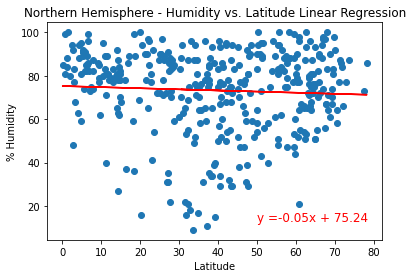

In [58]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slopen, interceptn, rvaluen, pvaluen, stderrn) = linregress(x_values, y_values)
rsqn = round(rvaluen**2,2)
regress_values = x_values * slopen + interceptn
line_eqn = "y =" + str(round(slopen,2)) + "x + " + str(round(interceptn,2))
print(f"Regression line equation is: {line_eqn}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eqn,(50,13),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqn}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.17x + 73.21.
The r-squared is: 0.01


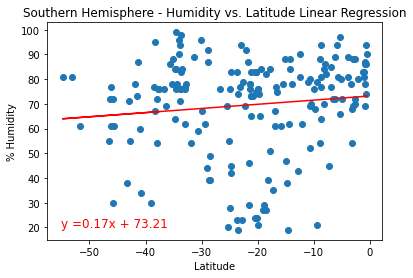

In [60]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slopes, intercepts, rvalues, pvalues, stderrs) = linregress(x_values, y_values)
rsqs = round(rvalues**2,2)
regress_values = x_values * slopes + intercepts
line_eq = "y =" + str(round(slopes,2)) + "x + " + str(round(intercepts,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqs}")

In both the Northern and Southern Hemisphere, there no correlation between latitude and humidity ($R^{2}$ = 0 and 0.01, respectively). 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.11x + 53.81.
The r-squared is: 0.0


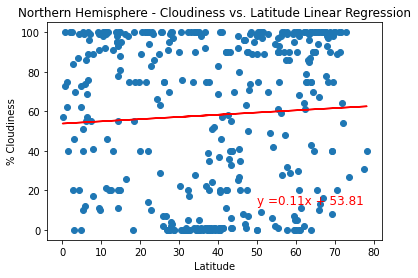

In [61]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slopen, interceptn, rvaluen, pvaluen, stderrn) = linregress(x_values, y_values)
rsqn = round(rvaluen**2,2)
regress_values = x_values * slopen + interceptn
line_eqn = "y =" + str(round(slopen,2)) + "x + " + str(round(interceptn,2))
print(f"Regression line equation is: {line_eqn}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eqn,(50,13),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqn}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.28x + 53.26.
The r-squared is: 0.01


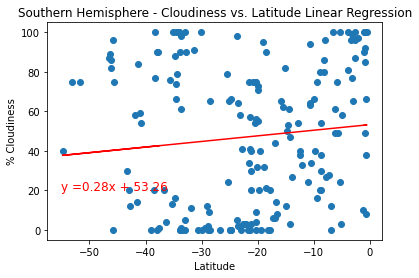

In [62]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slopes, intercepts, rvalues, pvalues, stderrs) = linregress(x_values, y_values)
rsqs = round(rvalues**2,2)
regress_values = x_values * slopes + intercepts
line_eq = "y =" + str(round(slopes,2)) + "x + " + str(round(intercepts,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqs}")

In both the Northern and Southern Hemisphere, there no correlation between latitude and cloudiness ($R^{2}$ = 0 and 0.01, respectively). 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =0.03x + 6.42.
The r-squared is: 0.01


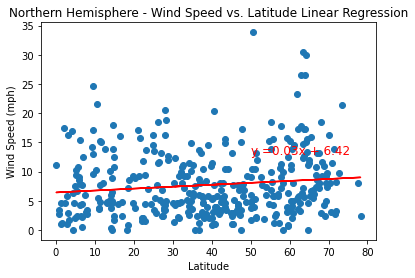

In [64]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slopen, interceptn, rvaluen, pvaluen, stderrn) = linregress(x_values, y_values)
rsqn = round(rvaluen**2,2)
regress_values = x_values * slopen + interceptn
line_eqn = "y =" + str(round(slopen,2)) + "x + " + str(round(interceptn,2))
print(f"Regression line equation is: {line_eqn}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eqn,(50,13),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqn}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =-0.04x + 6.76.
The r-squared is: 0.01


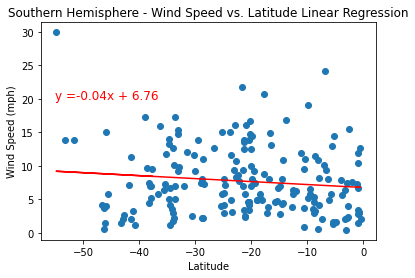

In [63]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slopes, intercepts, rvalues, pvalues, stderrs) = linregress(x_values, y_values)
rsqs = round(rvalues**2,2)
regress_values = x_values * slopes + intercepts
line_eq = "y =" + str(round(slopes,2)) + "x + " + str(round(intercepts,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rsqs}")

In both the Northern and Southern Hemisphere, there no correlation between latitude and wind speed ($R^{2}$ = 0 and 0.01, respectively). 

## Analysis and observations
1. As expected, of the weather metrics assessed, latitude has the greatest determining effect on temperature.
2. Wind speed, humidity, and cloudiness had no observable correlation with latitude.
3. The hottest temperatures are found close to the equator.